# 19_Mask man 3

### 이전 시간

In [1]:
import sys
import numpy as np
import pandas as pd
import os
import glob
        # Return a list of paths matching a pathname pattern.
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------# 

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# --------------------------------------------------#
path = './dataset/Face Mask Dataset/'
dataset = {'image_path' : [], 'mask_status' : [], 'where': []}

for where in os.listdir(path):      # test / train / validation
    print(where)
    for status in os.listdir(path + '/' + where):       # withmask / withoutmask
        
        for image in glob.glob(path + where + '/' + status + '/' + '*.png'):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)


## .ds_store 해결 : find . -name "*.DS_Store" -type f -delete           << cmd


# ---------------------------------------------------#
dataset = pd.DataFrame(dataset)
dataset.head()

# ---------------------------------------------------# 

# print('With Mask : ', dataset.value_counts('mask_status')[0])
# print('Without Mask : ', dataset.value_counts('mask_status')[1])

# sns.countplot(x=dataset['mask_status']);



# ----------------------------------------------------# 
import cv2

# 데이터 프레임 각각 나누기
train_df = dataset[dataset['where'] == 'Train']
test_df = dataset[dataset['where'] == 'Test']
valid_df = dataset[dataset['where'] == 'Validation']


# 인덱스 정리
train_df = train_df.reset_index().drop('index', axis =1 )



# ---------------------------------------------------------#
# pre-processing // 데이터 전처리
data = []
image_size = 150

for i in range(len(train_df)):
    # Converting the image into grayscale
    img_array = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)
                                                            # 이미지를 읽어올 때, grayscale 로 불러온다.

    # Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))
                            # resize : A 이미지를 (x,x) 사이즈로 변경
                                # object
                                            # (x,y) 사이즈

    # Encoding the image with the label
    if train_df['mask_status'][i] == 'WithMask':
        data.append([new_image_array, 1])
                    # new_image_array : np.array 타입임. 따라서 해당 밸류가 리스트에 들어가게 되면, [[new_image_array], 1] 의 형식으로 들어가게 된다.
    else:
        data.append([new_image_array, 0])


# 데이터 shuffle // label과 데이터가 섞일 수 있도록 하기 위해 셔플

np.random.shuffle(data)



# -----------------------------------------------# 
# X, y 데이터로 저장
X = []      # 이미지 feature    
y = []      # 이미지 label

for image in data:
    X.append(image[0])
    y.append(image[1])


## tensorflow 에서 오동작 하지 않도록 np.array() 함.
X = np.array(X)
y = np.array(y)

# ---------------------------------------------#

# 트레인 데이터 다시 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

Test
Train
Validation


-----------------

# LeNET

In [2]:
from tensorflow.keras import layers, models
                
                # LeNET
model = models.Sequential(
    [
        layers.Conv2D(
            32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150, 150, 1) ),
            # channel number

        layers.MaxPool2D(pool_size=(2, 2), strides=(2,2)),
        layers.Conv2D(64, (2, 2), activation='relu', padding='same'),

        layers.MaxPool2D(pool_size=(2,2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1, activation='sigmoid')           
                    # 출력을 하나로 잡았다.
                    # 0, 1 중 하나만 나오게 된다.
    ]
)

2022-06-10 20:25:05.074530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-10 20:25:05.075770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [3]:
# compile

model.compile(
    optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(),
            # optimizer 는 잘 모르겠으면 adam : 강사님 말씀 
    metrics = ['accuracy']
)

In [4]:
# train
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
                            # train_data의 개수
                                        # train_data의 사이즈 : 150 * 150
                                                                            # 차원 맞추기
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)
history = model.fit(X_train, y_train, epochs=4, batch_size = 32)

2022-06-10 20:34:00.361893: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/4


2022-06-10 20:34:01.445001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 102s 394ms/step - loss: 25.8810 - accuracy: 0.8785
Epoch 2/4
250/250 [==============================] - 85s 340ms/step - loss: 0.1061 - accuracy: 0.9620
Epoch 3/4
250/250 [==============================] - 90s 361ms/step - loss: 0.0583 - accuracy: 0.9789
Epoch 4/4
250/250 [==============================] - 76s 306ms/step - loss: 0.0925 - accuracy: 0.9641


In [5]:
# Validation accuracy
model.evaluate(X_val, y_val)

2022-06-10 20:40:08.444213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 7s 101ms/step - loss: 0.0961 - accuracy: 0.9705


[0.09607012569904327, 0.9705000519752502]

In [6]:
# 상대적으로 0에 대한 recall이 조금 떨어지지만
prediction = (model.predict(X_val) > 0.5).astype('int32')
                        # 0.5보다 크면 1로 본다.
                        # print(int(2 > 0.5))       >> 1
                        # print(int(0.4 > 0.5))     >> 0

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

2022-06-10 20:52:50.581559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1012
           1       0.97      0.97      0.97       988

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[986  26]
 [ 33 955]]


# confusion_matrix 해설
### `C (0,0)` : 마스크를 쓰지 않았는데, 마스크를 쓰지 않았다고 예측한 수
### `C (0,1)` : 마스크를 쓰지 않았는데, 마스크를 썼다고 예측한 수
### `C (1,0)` : 마스크를 썼는데, 마스크를 쓰지 않았다고 예측한 수
### `C (1,1)` : 마스크를 썼는데, 마스크를 썼다고 예측한 수

In [15]:
# 틀린것 추리기
wrong_result = []

for n in range(0, len(y_val)):
    if prediction[n] != y_val[n]:           # index 값을 찾게 된다.
        wrong_result.append(n)

len(wrong_result)

59

/Users/newrandom/miniforge3/envs/TF/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


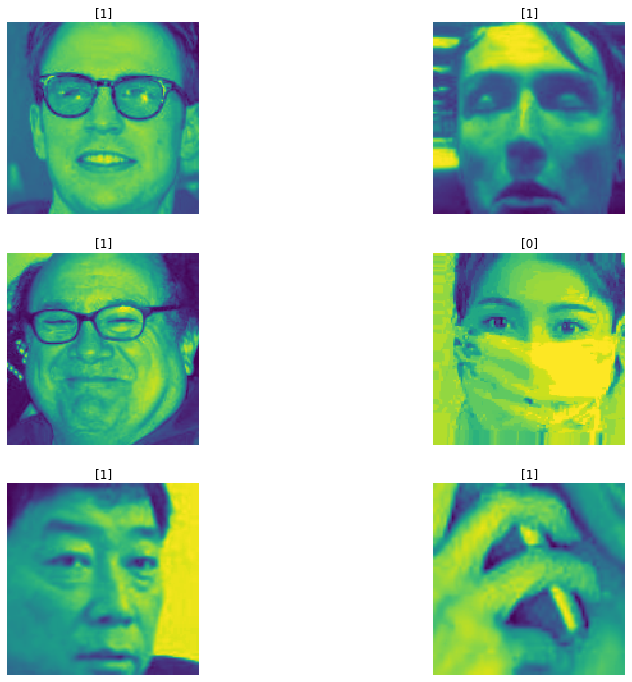

In [18]:
import random

samples = random.choices(population = wrong_result, k=6)
                # choices : Return a k sized list of population elements chosen with replacement.
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx+1)
    plt.imshow(X_val[n].reshape(150, 150), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis('off')


plt.show()